In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"praneethratna","key":"57505796f1423c29bf8703d93be4ab2e"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species
!mkdir data
! unzip 100-bird-species.zip -d data

In [18]:
from urllib.request import urlretrieve
import tensorflow as tf
import os
from tensorflow import keras
from keras.layers import Dense , Flatten , GlobalAveragePooling2D , Dropout ,BatchNormalization
from keras import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import Adam
import math

In [ ]:
TRAIN_PATH = '/content/' + '/data/train/'
VAL_PATH = '/content/' + '/data/valid/'
train = ImageDataGenerator(rescale = 1./255,
                           rotation_range=10,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True,
                           shear_range=0.2)
train_datagen = train.flow_from_directory(TRAIN_PATH,target_size= (224,224),class_mode = 'categorical',batch_size = 1024)
val = ImageDataGenerator(rescale = 1./255,
                         rotation_range=10,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         horizontal_flip=True,
                         shear_range=0.2)
val_datagen = val.flow_from_directory(VAL_PATH,target_size= (224,224),class_mode = 'categorical',batch_size = 1024)

Found 39364 images belonging to 275 classes.
Found 1375 images belonging to 275 classes.


In [19]:
weightsurl = "https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weightspath = 'inceptionweights.h5'
urlretrieve(weightsurl,weightspath)
pretrained = InceptionV3(input_shape=(224,224,3),include_top=False,weights = None)
pretrained.load_weights(weightspath)
for layer in pretrained.layers:
  layer.trainable = False

In [20]:
# pretrained.summary()
layer = pretrained.get_layer('mixed7')
output = layer.output

In [21]:
x = GlobalAveragePooling2D()(output)
x = Flatten()(x)
x = Dense(units = 512,activation= 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(units = 512,activation= 'relu')(x)
x = Dropout(0.1)(x)
x = Dense(units=275,activation='softmax')(x)

model = Model(inputs = pretrained.input,outputs = x)

In [22]:
model.compile(optimizer=Adam(learning_rate = 0.01),loss = 'categorical_crossentropy',metrics = ['acc'])


In [23]:
h = model.load_weights('weights.h5')

In [ ]:
TRAIN_STEPS = math.floor(39364/1024)
VAL_STEPS=math.floor(1375/1024)
history = model.fit(train_datagen,epochs=20,verbose=1,validation_data=val_datagen,
                    steps_per_epoch = TRAIN_STEPS,
                    validation_steps=VAL_STEPS)
model.save_weights('weights.h5')

Epoch 1/20
38/38 [==============================] - 470s 11s/step - loss: 5.2032 - acc: 0.0311 - val_loss: 2.7407 - val_acc: 0.3213
Epoch 2/20
38/38 [==============================] - 415s 11s/step - loss: 2.7469 - acc: 0.2997 - val_loss: 1.2527 - val_acc: 0.6641
Epoch 3/20
38/38 [==============================] - 396s 10s/step - loss: 1.8414 - acc: 0.4924 - val_loss: 0.9276 - val_acc: 0.7383
Epoch 4/20
38/38 [==============================] - 404s 11s/step - loss: 1.5247 - acc: 0.5707 - val_loss: 0.7529 - val_acc: 0.7773
Epoch 5/20
38/38 [==============================] - 418s 11s/step - loss: 1.4044 - acc: 0.6049 - val_loss: 0.6319 - val_acc: 0.8193
Epoch 6/20
38/38 [==============================] - 400s 10s/step - loss: 1.2658 - acc: 0.6426 - val_loss: 0.5790 - val_acc: 0.8379
Epoch 7/20
38/38 [==============================] - 388s 10s/step - loss: 1.1934 - acc: 0.6569 - val_loss: 0.5832 - val_acc: 0.8320
Epoch 8/20
38/38 [==============================] - 389s 10s/step - loss: 1.

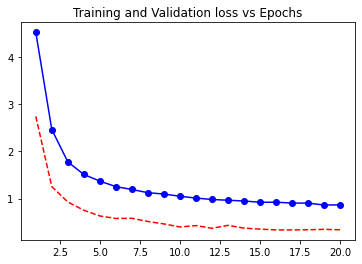

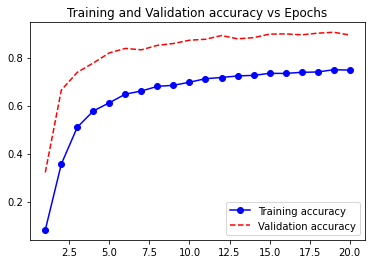

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo-',label = "Training loss")
plt.plot(epochs,val_loss,'r--',label = "Validation loss")
plt.title("Training and Validation loss vs Epochs")
plt.show()

plt.plot(epochs,acc,'bo-',label = "Training accuracy")
plt.plot(epochs,val_acc,'r--',label = "Validation accuracy")
plt.title("Training and Validation accuracy vs Epochs")
plt.legend()
plt.show()



In [ ]:
types = ['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH',
         'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW',
         'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 
         'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BORNEAN BRISTLEHEAD', 'BORNEAN LEAFBIRD', 'BROWN NOODY', 'BROWN THRASHER', 'BULWERS PHEASANT', 'CACTUS WREN',
         'CALIFORNIA CONDOR', 'CALIFORNIA GULL', 'CALIFORNIA QUAIL', 'CANARY', 'CAPE MAY WARBLER', 'CAPUCHINBIRD', 'CARMINE BEE-EATER', 'CASPIAN TERN', 'CASSOWARY', 'CEDAR WAXWING', 'CHARA DE COLLAR', 'CHIPPING SPARROW', 'CHUKAR PARTRIDGE', 'CINNAMON TEAL', 
         'CLARKS NUTCRACKER', 'COCK OF THE  ROCK', 'COCKATOO', 'COMMON FIRECREST', 'COMMON GRACKLE', 'COMMON HOUSE MARTIN', 'COMMON LOON', 'COMMON POORWILL', 'COMMON STARLING', 'COUCHS KINGBIRD', 'CRESTED AUKLET', 'CRESTED CARACARA', 'CRESTED NUTHATCH', 'CROW', 'CROWNED PIGEON', 'CUBAN TODY', 
         'CURL CRESTED ARACURI', 'D-ARNAUDS BARBET', 'DARK EYED JUNCO', 'DOUBLE BARRED FINCH', 'DOWNY WOODPECKER', 'EASTERN BLUEBIRD', 'EASTERN MEADOWLARK', 'EASTERN ROSELLA', 'EASTERN TOWEE', 'ELEGANT TROGON', 'ELLIOTS  PHEASANT', 'EMPEROR PENGUIN', 'EMU', 'ENGGANO MYNA', 'EURASIAN GOLDEN ORIOLE', 'EURASIAN MAGPIE', 'EVENING GROSBEAK', 'FIRE TAILLED MYZORNIS', 'FLAME TANAGER', 'FLAMINGO', 'FRIGATE', 'GAMBELS QUAIL',
         'GANG GANG COCKATOO', 'GILA WOODPECKER', 'GILDED FLICKER', 'GLOSSY IBIS', 'GO AWAY BIRD', 'GOLD WING WARBLER', 'GOLDEN CHEEKED WARBLER', 'GOLDEN CHLOROPHONIA', 'GOLDEN EAGLE', 'GOLDEN PHEASANT', 'GOLDEN PIPIT', 'GOULDIAN FINCH', 
         'GRAY CATBIRD', 'GRAY PARTRIDGE', 'GREAT POTOO', 'GREATOR SAGE GROUSE', 'GREEN JAY', 'GREEN MAGPIE', 'GREY PLOVER', 'GUINEA TURACO', 'GUINEAFOWL', 'GYRFALCON', 'HARPY EAGLE', 'HAWAIIAN GOOSE', 'HELMET VANGA', 'HIMALAYAN MONAL', 'HOATZIN', 'HOODED MERGANSER', 'HOOPOES', 'HORNBILL', 'HORNED GUAN', 'HORNED SUNGEM',
         'HOUSE FINCH', 'HOUSE SPARROW', 'IMPERIAL SHAQ', 'INCA TERN', 'INDIAN BUSTARD', 'INDIAN PITTA', 'INDIGO BUNTING', 'JABIRU', 'JAVA SPARROW', 'KAKAPO', 'KILLDEAR', 'KING VULTURE', 'KIWI', 'KOOKABURRA', 'LARK BUNTING', 'LEARS MACAW', 'LILAC ROLLER', 'LONG-EARED OWL', 'MAGPIE GOOSE', 'MALABAR HORNBILL', 'MALACHITE KINGFISHER', 'MALEO', 'MALLARD DUCK', 'MANDRIN DUCK', 'MARABOU STORK', 'MASKED BOOBY', 'MASKED LAPWING', 'MIKADO  PHEASANT', 'MOURNING DOVE', 
         'MYNA', 'NICOBAR PIGEON', 'NOISY FRIARBIRD', 'NORTHERN BALD IBIS', 'NORTHERN CARDINAL', 'NORTHERN FLICKER', 'NORTHERN GANNET', 'NORTHERN GOSHAWK', 'NORTHERN JACANA', 'NORTHERN MOCKINGBIRD', 'NORTHERN PARULA', 'NORTHERN RED BISHOP', 'NORTHERN SHOVELER', 'OCELLATED TURKEY', 'OKINAWA RAIL', 'OSPREY', 'OSTRICH', 'OVENBIRD', 'OYSTER CATCHER', 'PAINTED BUNTIG', 'PALILA', 'PARADISE TANAGER', 'PARAKETT  AKULET', 'PARUS MAJOR', 'PEACOCK', 'PELICAN',
         'PEREGRINE FALCON', 'PHILIPPINE EAGLE', 'PINK ROBIN', 'PUFFIN', 'PURPLE FINCH', 'PURPLE GALLINULE', 'PURPLE MARTIN', 'PURPLE SWAMPHEN', 'PYGMY KINGFISHER', 'QUETZAL', 'RAINBOW LORIKEET', 'RAZORBILL', 'RED BEARDED BEE EATER',
         'RED BELLIED PITTA', 'RED BROWED FINCH', 'RED FACED CORMORANT', 'RED FACED WARBLER', 'RED HEADED DUCK', 'RED HEADED WOODPECKER', 'RED HONEY CREEPER', 'RED TAILED THRUSH', 'RED WINGED BLACKBIRD', 'RED WISKERED BULBUL', 'REGENT BOWERBIRD', 'RING-NECKED PHEASANT', 'ROADRUNNER', 'ROBIN', 'ROCK DOVE', 'ROSY FACED LOVEBIRD', 'ROUGH LEG BUZZARD', 'ROYAL FLYCATCHER', 
         'RUBY THROATED HUMMINGBIRD', 'RUFOUS KINGFISHER', 'RUFUOS MOTMOT', 'SAMATRAN THRUSH', 'SAND MARTIN', 'SCARLET IBIS', 'SCARLET MACAW',
         'SHOEBILL', 'SHORT BILLED DOWITCHER', 'SMITHS LONGSPUR', 'SNOWY EGRET', 'SNOWY OWL', 'SORA', 'SPANGLED COTINGA', 'SPLENDID WREN', 'SPOON BILED SANDPIPER', 
         'SPOONBILL', 'SRI LANKA BLUE MAGPIE', 'STEAMER DUCK', 'STORK BILLED KINGFISHER', 'STRAWBERRY FINCH', 'STRIPPED SWALLOW', 'SUPERB STARLING', 'SWINHOES PHEASANT', 'TAIWAN MAGPIE', 'TAKAHE', 'TASMANIAN HEN', 'TEAL DUCK', 'TIT MOUSE', 'TOUCHAN', 'TOWNSENDS WARBLER', 'TREE SWALLOW', 'TRUMPTER SWAN', 'TURKEY VULTURE', 'TURQUOISE MOTMOT',
         'UMBRELLA BIRD', 'VARIED THRUSH', 'VENEZUELIAN TROUPIAL', 'VERMILION FLYCATHER', 'VICTORIA CROWNED PIGEON', 'VIOLET GREEN SWALLOW', 'VULTURINE GUINEAFOWL', 'WATTLED CURASSOW', 'WHIMBREL', 'WHITE CHEEKED TURACO', 'WHITE NECKED RAVEN', 'WHITE TAILED TROPIC', 'WHITE THROATED BEE EATER', 'WILD TURKEY', 'WILSONS BIRD OF PARADISE', 'WOOD DUCK', 'YELLOW BELLIED FLOWERPECKER', 'YELLOW CACIQUE', 'YELLOW HEADED BLACKBIRD']


In [24]:
from google.colab import files
images = files.upload()

Saving 226739201.jpg to 226739201.jpg


The image you uploaded is an STRIPPED SWALLOW 🙂 and the uploaded image is


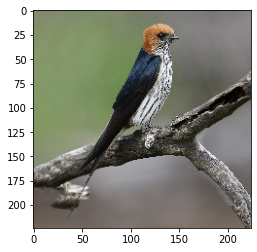

In [25]:
from keras.preprocessing.image import load_img , img_to_array

for fn in images.keys():
  img = '/content/' + fn
  y = load_img(img,target_size=(224,224))
  x = img_to_array(y)
  x = x/255
  x = np.expand_dims(x,axis=0)
  prediction = model.predict(x)
  print("The image you uploaded is an {} 🙂 and the uploaded image is".format(types[np.argmax(prediction)]))
  plt.imshow(y)
